In [ ]:
pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [4]:
df = pd.read_csv(r"E:\dbda khargar\Stats and R\cars_data.csv")

In [8]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Driven_Wheels', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [6]:
df = df.rename(columns={"Engine HP":"HP", "Engine Cylinders": "Cylinders", "Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg": "MPG-C", "MSRP": "Price"})
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [13]:
#checking shape or number of columns
df.shape

(11914, 10)

In [7]:
#checking what are duplicated rows look like
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows are ", duplicate_rows_df.shape)

Number of duplicated rows are  (989, 10)


In [8]:
#dropping duplicate rows and checking number of rows
df = df.drop_duplicates()
df.shape

(10925, 10)

In [23]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [24]:
#above we see that HP and cylinder rows have less count because some rows have null values

In [22]:
#Now to drop null values, first we check how many null values are present
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [9]:
# now we have the null values dropped ensuring all records have same count
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [27]:
#once again verifying if any null values are present
print(df.isnull().sum())

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


## Trying anova

In [16]:
anova = df[['Transmission','Price']]
anova.dtypes

Transmission    object
Price            int64
dtype: object

In [41]:
import  statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [27]:
df.dtypes

Make             object
Model            object
Year              int64
HP              float64
Cylinders       float64
Transmission     object
Drive Mode       object
MPG-H             int64
MPG-C             int64
Price             int64
dtype: object

In [31]:
mod1 = ols('Price ~ Transmission',data=anova).fit()

In [32]:
my_table = sm.stats.anova_lm(mod1)

In [19]:
print(my_table)

                   df        sum_sq       mean_sq          F         PR(>F)
Transmission      4.0  2.880156e+12  7.200390e+11  199.13131  4.747286e-165
Residual      10822.0  3.913128e+13  3.615901e+09        NaN            NaN


In [33]:
anova1 = df[['HP','Cylinders']]

In [34]:
mod2 = ols('HP ~ Cylinders',data=anova1).fit() 

In [35]:
my_table1=sm.stats.anova_lm(mod2)

In [36]:
print(my_table1)

                df        sum_sq       mean_sq             F  PR(>F)
Cylinders      1.0  8.110753e+07  8.110753e+07  17733.593005     0.0
Residual   10825.0  4.950993e+07  4.573666e+03           NaN     NaN


In [37]:
anova2 = df[['Price','Make']]
mod3 = ols('Price ~ Make',data=anova2).fit()
my_table2 = sm.stats.anova_lm(mod3)
my_table2

,df,sum_sq,mean_sq,F,PR(>F)
Make,46.0,3.186559e+13,6.927302e+11,736.02869,0.0
Residual,10780.0,1.014584e+13,9.411729e+08,NaN,NaN


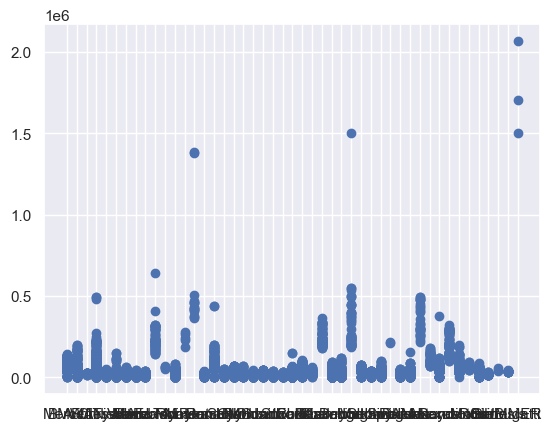

<Figure size 1600x1600 with 0 Axes>

In [43]:
plt.scatter(df['Make'],df['Price'])
plt.figure(figsize=(8,8),dpi=200)
plt.show()

In [44]:
df.columns

Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Drive Mode', 'MPG-H', 'MPG-C', 'Price'],
      dtype='object')

In [54]:
mod4 = ols('Price ~ Model + Year + HP + Cylinders + Transmission',data=df).fit()
my_table3 = sm.stats.anova_lm(mod4)
my_table3

,df,sum_sq,mean_sq,F,PR(>F)
Model,903.0,4.089958e+13,4.529301e+10,534.427104,0.000000e+00
Transmission,4.0,1.724373e+10,4.310932e+09,50.866104,1.855270e-42
Year,1.0,9.745836e+09,9.745836e+09,114.994334,1.105035e-26
HP,1.0,2.440362e+11,2.440362e+11,2879.463712,0.000000e+00
Cylinders,1.0,4.369398e+08,4.369398e+08,5.155597,2.319293e-02
Residual,9916.0,8.403867e+11,8.475058e+07,NaN,NaN


In [ ]:
mod5 = ols('Price ~ Model*Year*HP*Cylinders*Transmission',data=df).fit()
my_table4 = sm.stats.anova_lm(mod5)
my_table4

# Continuing with the instructions

<Axes: xlabel='Price'>

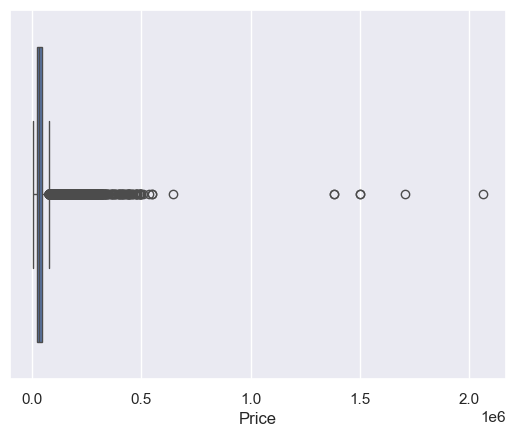

In [10]:
sns.boxplot(x=df['Price'])